#📦 Import Required Libraries

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#🌐 Load Dataset from URL

In [72]:
import pandas as pd
import requests
from io import StringIO

url = "https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day24-standardization/Social_Network_Ads.csv"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}
req = requests.get(url, headers=headers)
data = StringIO(req.text)



## 🧾 Load Data into DataFrame

In [73]:
df = pd.read_csv(data)

In [74]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


#Select Relevant Features

In [75]:
df=df.iloc[:,2:]

In [76]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [77]:
df.sample(5)

,Age,EstimatedSalary,Purchased
391,47,23000,1
224,35,60000,0
186,20,82000,0
259,45,131000,1
68,22,63000,0


#🧪 Split Data into Training and Testing Sets

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

#📐 Check Data Shapes

In [79]:
x_train.shape,x_test.shape

((280, 2), (120, 2))

### 📏 Feature Scaling (Standardization)


In [80]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

## 🧾 Convert Scaled Data to DataFrame


In [81]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [83]:
np.round(x_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [84]:
np.round(x_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## 📊 Visualization: Before vs After Scaling


Text(0.5, 1.0, 'After Scaling')

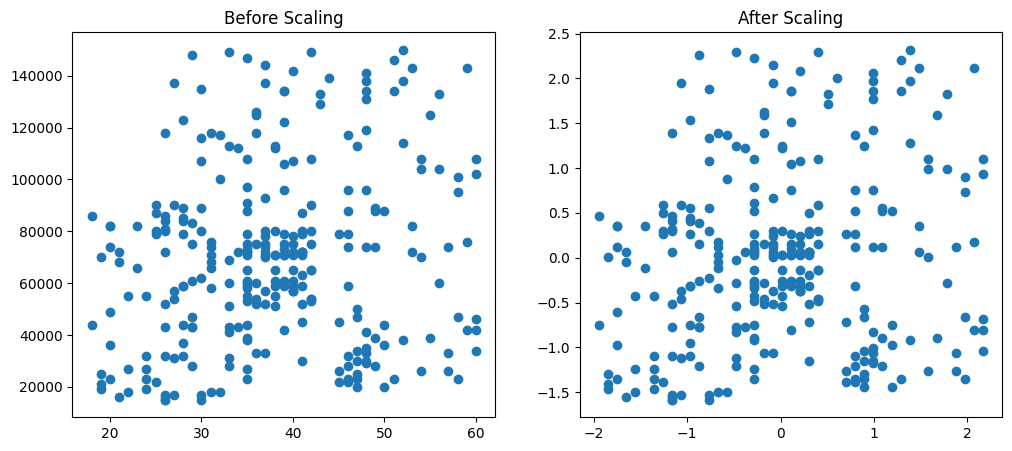

In [93]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'])
ax2.set_title("After Standard Scaling")

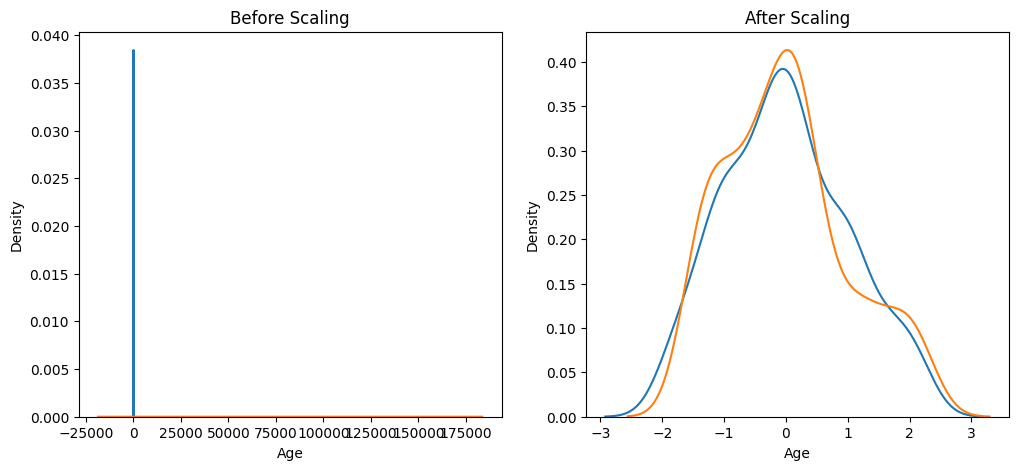

In [100]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)
ax2.set_title("After Standard Scaling")
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

## 📈 Distribution Analysis: Age Before vs After Scaling


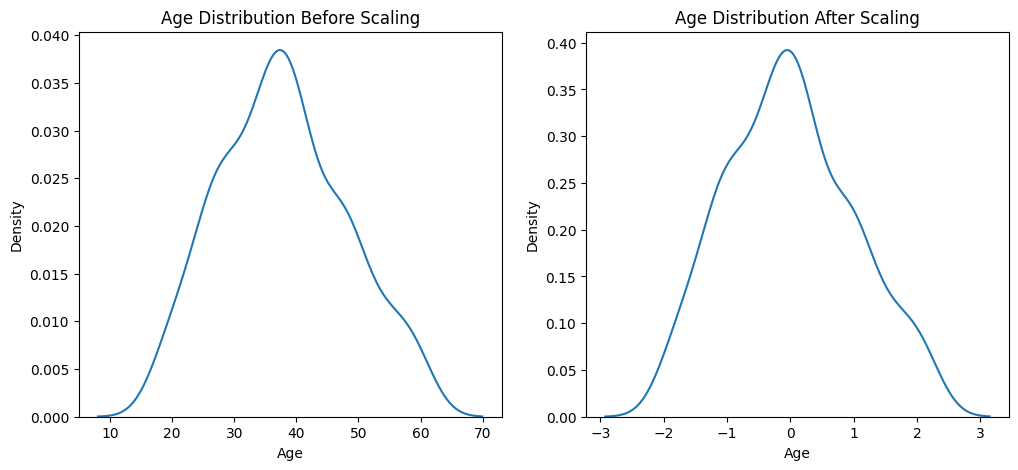

In [102]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Age Distribution Before Scaling")
sns.kdeplot(x_train['Age'],ax=ax1)

ax2.set_title("Age Distribution After Scaling")
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
plt.show()